# In vehicle coupon recommendation 
The purpose of this project is to predict 1) if a customer will accept the coupon or not under machine learning algorithms with best tuned parameters, and 2) mining the circumstances under which people are more likely to accept the coupons throung explornatory data analysis. 

## Table of contents
- [0 - Packages](#0) 
- [1 - Data Processing](#1)
  - [1.1 - Know your data](#1-1)
    - [1.1.1 - Show the first 5 records](#1-1-1)
    - [1.1.2 - Dimension](#1-1-2)
    - [1.1.3 - Fetures explanations](#1-1-3)
    - [1.1.4 - Feature statistics](#1-1-4)
    - [1.1.5 - Null or not](#1-1-5)
  - [1.2 - Data cleaning and transformation](#1-2)
    - [1.2.1 - Set data type to category](#1-2-1)
    - [1.2.2 - Drop car columns](#1-2-2)
    - [1.2.3 - Impute lack data](#1-2-3)
  - [1.3 - Summary](1-3)
- [2 - Exploratory Data Analysis](#2) 
  - [2.1 - Comparsion between coupon acception and rejection](#2.1)
  - [2.2 - Which features are indepedent with the target?](#2.2)
  - [2.3 - How do the rest of features influence the target?](#2.3)
  - [2.4 - Summary](2-4)
- [3 - Feature Enigineering](#3)
  - [3.1 - Feature selection](#3-1)
  - [3.2 - Feature encoding](#3-2)
    - [3.2.1 - Ordinal encoding](#3-2-1)
    - [3.2.2 - One hot encoding](#3-2-2)
    - [3.2.3 - Target encoding](#3-2-3)
    - [3.2.4 - Embedded encoding](#3-2-4)
    - [3.2.5 - Catboost encoding](#3-2-5)
  - [3.3 - Summary](#3-3)
- [4 - Classification Models](#4)
  - [4.1 - Logistic regression](#4-1)
  - [4.2 - Neural Network](#4.2)
    - [4.2.1 - Just one layer, baseline](#4-2-1)
    - [4.2.2 - Add hidden layers](#4-2-2)
    - [4.2.3 - Dropout](#4-2-3)
    - [4.2.4 - Optimizers](#4-2-4)
    - [4.2.5 - Number of epoches](#4-2-5)
    - [4.2.6 - Number of batch size](#4-2-6)
    - [4.2.7 - Learning rate](#4-2-7)
    - [4.2.8 - Number of Hidden neurons](#4-2-8)
    - [4.2.9 - Regularization](#4-2-9) 
  - [4.3 - Support Vector Machine(SVM)](#4.3)
    - [4.3.1 - Hard-Margin SVM](#4-3-1)
    - [4.3.2 - Soft-Margin SVM](#4-3-2)
  - [4.4 - Summary](#4-4)
- [5 - Clustering](#5)

<a name='0'></a>
# 0 - Load Package
Here are all packages that will be used in this notebook. We are telling the story on the shoulder of gaints, resp. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from sklearn.feature_selection import chi2
from scipy import stats
from pandas import read_csv
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from google.colab import files

<a name='1'></a>
# 1 - Data Preprocessing
This chapter preprocesses the [in-vehicle coupon recommendation Data Set](https://archive.ics.uci.edu/ml/datasets/in-vehicle+coupon+recommendation) from UCI Machine Learnign Repository. When it comes to a new data, knowing your data can help you with better decisions on how to clean or transform data, which makes the potential insights clear. What do we need to know? Here is the receipt, data dimension, exact meaning for columns, any null value inside, are there some outliers or inconsitent values. How can solve the problem? Would be some difference for numerical variables and categorical variables? 

<a name='1-1'></a>
## 1.1 - Know your data

<a name="1-1-1"></a>
### 1.1.1 - Show the first 5 records
Just have a glimpse of your data to form the basic understanding.

In [2]:
file = files.upload()
df = pd.read_csv('Vehicle_Coupon.csv')  # The data file can be accessed in Dat_Set folder
df.head()

Saving Vehicle_Coupon.csv to Vehicle_Coupon.csv


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


<a name='1-1-2'></a>
### 1.1.2 -  Dimension
The original coupon recommendation dataset is composed with 12684 records and 26 columns.

In [3]:
df.shape

(12684, 26)

<a name='1-1-3'></a>
### 1.1.3 Features Explanations
Among 26 columns, 25 of them are features which may affect the acception/rejection of the coupun that are represented as 1/0 in target column. All should be categorical variables as the physical meaning. The features can be roughly categorized into 3 parts, passenger info, coupon info, and driving info. For passenge info, it can be gender, age, maritalStatus, has_child, education, occupation, income (7). For coupon info, they are coupon, expiration, Bar, CoffeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50 (7). For driving info, destination, passanger, weather, time, car, toCoupon_GEQ5min, toCoupon_GEQ15min, toCoupon_GEQ25min, direction_same, direction_opp (10).

In [4]:
for f in df.columns:
  print(f, df[f].unique(), '\n')

destination ['No Urgent Place' 'Home' 'Work'] 

passanger ['Alone' 'Friend(s)' 'Kid(s)' 'Partner'] 

weather ['Sunny' 'Rainy' 'Snowy'] 

temperature [55 80 30] 

time ['2PM' '10AM' '6PM' '7AM' '10PM'] 

coupon ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)'] 

expiration ['1d' '2h'] 

gender ['Female' 'Male'] 

age ['21' '46' '26' '31' '41' '50plus' '36' 'below21'] 

maritalStatus ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed'] 

has_children [1 0] 

education ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School'] 

occupation ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Commu

<a name="1-1-4"></a>
### 1.1.4 -  Features Statistics
From above, we understand that the meaning for all columns. In this part, we explore the their data type and quantity to see if whether it meet our expectation for all categorical variables or dectect the outliners. The insights are 1) some of them are int type, so we may need to tranform the data type to category type that can be seen in section 1.2.1. 2) no outliners are detected in the group statistics, thus ensuring the consientency of the data for further analysis.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


<a name='1-1-5'></a>
### 1.1.5 - Null or not
99.15 percent of values in car column is null, and ~1 percent of values in Bar, CoffeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50 are missing. As a measure, we plans to drop the car column (section 1.2.2) and impute other nan value in the abovementioned columns, as is implementated in section 1.2.3. 

In [7]:
df.isnull().sum() / df.shape[0] * 100

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

<a name='1-2'></a>
## 1.2 - Data cleaning and transformation
From the observations from section 1.1 know your data, we set data type to catergory to avoid some unexpected int encoding, drop the car column for its nearly 90% null value and impute the rest lack data using the most frequent category that happens in that feature. What I want to note is that this part can prepare for exploratory data analysis but not for the models. For latter purpose, we have a separate chapter, 3. Feature Engineering, to acheive.

<a name='1-2-1'></a>
### 1.2.1 -  Set data type as category

In [8]:
df = df.astype('category')
df.dtypes

destination             category
passanger               category
weather                 category
temperature             category
time                    category
coupon                  category
expiration              category
gender                  category
age                     category
maritalStatus           category
has_children            category
education               category
occupation              category
income                  category
car                     category
Bar                     category
CoffeeHouse             category
CarryAway               category
RestaurantLessThan20    category
Restaurant20To50        category
toCoupon_GEQ5min        category
toCoupon_GEQ15min       category
toCoupon_GEQ25min       category
direction_same          category
direction_opp           category
Y                       category
dtype: object

<a name='1-2-2'></a>
### 1.2.2 - Drop car column

In [9]:
df.drop(columns='car', inplace=True)
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

<a name='1-2-3'></a>
### 1.2.3 - Impute lack data

[Ref](https://jamesrledoux.com/code/imputation#:~:text=One%20approach%20to%20imputing%20categorical,given%20in%20Pandas'%20value_counts%20function.)

In [10]:
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df.isnull().sum().sum()

0

### 1.3 - Summary
We start with how the data looks like, its dimension, features meaning, features statistics to see if there are abnormal values based on domain knowldege, and check null values for potential drop or imputation. Then, we switch to data cleaning and transformation with respect to the insights from last step. Because, our data are catergorical, so we check the its consistency by looking unique values for all features in feature statistics. If there is numerical data, scatter plot for all features and target would be a wise option to detect the outliners.

<a name='2'></a>
## 2 - Exploratory Data Analysis
This chapter mine the relationship between influential factors on coupons acception. At first, we compare the coupon acception and rejection rate for 
the acquaintance of current advertising situation and the significance of a recommendation system with a high accuracy. Then, we ask which features may influene the coupons acception? And how do they impact? After all explaration, we will know the answer of those questions.

<a name='2-1'></a>
## 2.1 - Comparison between coupon acception and rejection

The accept number is 7210 and reject one is 5474. It can be roughly regarded as balance data set. Then we draw a bar chart and pie to represent the number and ratio. 

- Create a combination graph with left bar chart to show the number, and right pie chart to show the ratio.

In [28]:
accept_num = (df.Y == 1).sum() 
reject_num = (df.Y == 0).sum() 
accept_rate = (df.Y == 1).sum() / df.shape[0]
reject_rate = 1 - accept_rate
print("The accept number is %i, and the reject number is %i, with rates %.2f, %.2f \
respectively " %(accept_num, reject_num, accept_rate, reject_rate))

The accept number is 7210, and the reject number is 5474, with rates 0.57, 0.43 respectively 


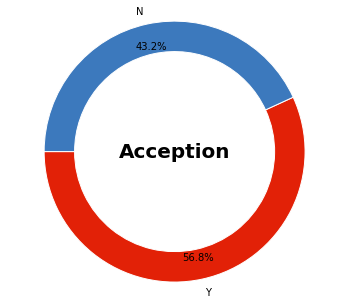

In [37]:
def make_pie(sizes, text,colors,labels):
    import matplotlib.pyplot as plt
    import numpy as np

    col = [[i/255. for i in c] for c in colors]

    fig, ax = plt.subplots()
    ax.axis('equal')
    width = 0.35
    kwargs = dict(colors=col, startangle=180, autopct='%1.1f%%')
    outside, _, _ = ax.pie(sizes, radius=1.5, pctdistance=1-width/2,
                       labels=labels,**kwargs)
    plt.setp( outside, width=width, edgecolor='white')

    kwargs = dict(size=20, fontweight='bold', va='center')
    ax.text(0, 0, text, ha='center', **kwargs)
    plt.show()

c1 = (226,33,7)
c2 = (60,121,189)

make_pie([7210,5474], "Acception",[c1,c2],['Y','N'])



<a name='2-2'></a>
## 2.2 -  Which features will be indepedent of target?
We conduct Chi-square test and plot p values using heatmap to verify the independence between features and target. From the bottom line of the heatmap, we can tell the p values between toCoupon_GET5min, destination_same, destination_opp and Y target are 1, 0.1, 0.1. If our alpha limit set as 0.05, that means if the p-value is below 0.05, we will regard the dependency relationship between features and target and indepedent one for those two variables if their p-value is above 0.05. This provide the reference for feature selection.
[Ref](https://medium.com/analytics-vidhya/constructing-heat-map-for-chi-square-test-of-independence-6d78aa2b140f#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6IjFiZDY4NWY1ZThmYzYyZDc1ODcwNWMxZWIwZThhNzUyNGM0NzU5NzUiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJuYmYiOjE2NTc1NzcwNTcsImF1ZCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsInN1YiI6IjExNjk2NjQyODk4MDIxNTU1MjE0OSIsImVtYWlsIjoieWFubWluZ2xpdTIxQGdtYWlsLmNvbSIsImVtYWlsX3ZlcmlmaWVkIjp0cnVlLCJhenAiOiIyMTYyOTYwMzU4MzQtazFrNnFlMDYwczJ0cDJhMmphbTRsamRjbXMwMHN0dGcuYXBwcy5nb29nbGV1c2VyY29udGVudC5jb20iLCJuYW1lIjoiWWFubWluZyBMaXUiLCJwaWN0dXJlIjoiaHR0cHM6Ly9saDMuZ29vZ2xldXNlcmNvbnRlbnQuY29tL2EvQUl0YnZtbW1DdnlEVzktaWF0dXQzYXhlQWFlZGpIWV9TY2laNWI4M3dfLTY9czk2LWMiLCJnaXZlbl9uYW1lIjoiWWFubWluZyIsImZhbWlseV9uYW1lIjoiTGl1IiwiaWF0IjoxNjU3NTc3MzU3LCJleHAiOjE2NTc1ODA5NTcsImp0aSI6IjhmMmJjM2MwOTk2NDZmMDdiODBhYTZmNWE5OGY5ZGU0YTk3YzAxMTQifQ.Tvz3S-XbT029APxcmsPETDBUj8S1ir0iYejfv9QbpWLtuCDYwxxbDuQv1FCL9Wz_D8hmxPutvuOgrF-dFT5oMYTq6rn0hV8Z0UNNn8rBR_KofiuSx10ChpZgJfmMAtqccsfW20Yk__v_xvZPNOLnjiHdXZAtoQiWUNo9VFAZ58NM98KjLfkkJ0r715iuIQrnyzWnUnabgwO96GT1OTaLynipdg6ugvClNENa3WZIncBtdqlP4jeTE7QOEPnTMRUntHGCTj5VRsnJRYt3OYpE6BqQgANptFUygI-K47IM5WSAicSFzmxyp9CgJxQ3U4d4S3LPKqiBy63v7gkxkLJPhQ)

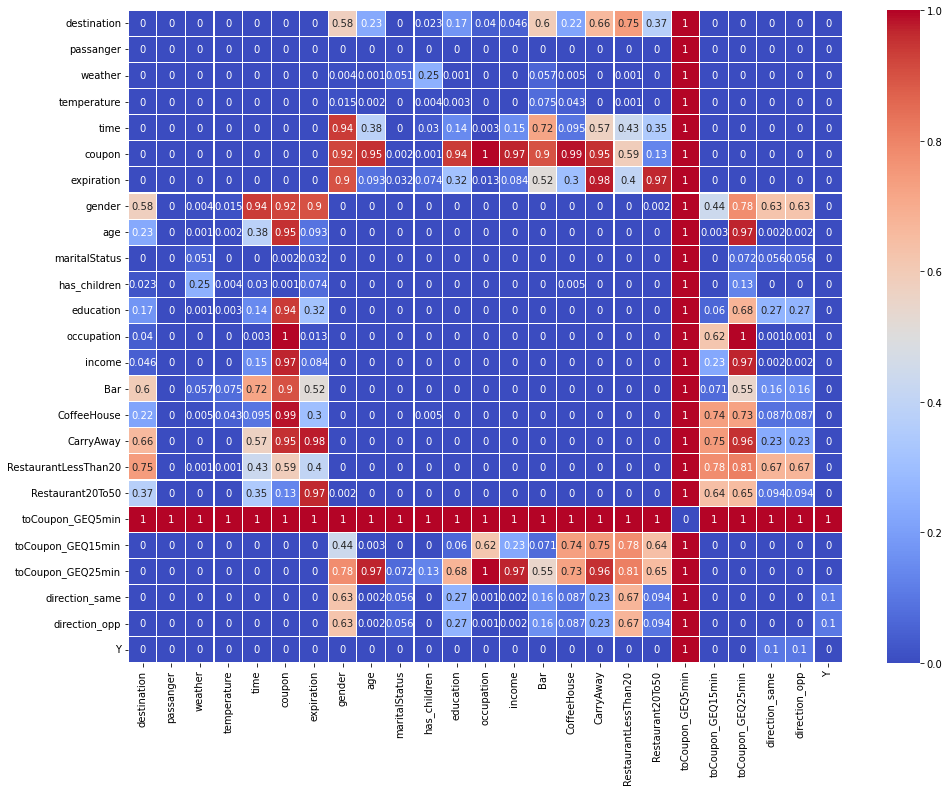

In [12]:
df = df.astype('object')
column_names=df.columns

chisqmatrix=pd.DataFrame(df,columns=column_names,index=column_names)


outercnt=0
innercnt=0
for icol in column_names:
    for jcol in column_names:
       mycrosstab=pd.crosstab(df[icol],df[jcol])
       stat,p,dof,expected=stats.chi2_contingency(mycrosstab)
       chisqmatrix.iloc[outercnt,innercnt]=round(p,3)
       cntexpected=expected[expected<5].size
       perexpected=((expected.size-cntexpected)/expected.size)*100
       if perexpected<20:
            chisqmatrix.iloc[outercnt,innercnt]=2
       if icol==jcol:
           chisqmatrix.iloc[outercnt,innercnt]=0.00
       innercnt=innercnt+1
    outercnt=outercnt+1
    innercnt=0
    

plt.figure(figsize = (16,12))
sns.heatmap(chisqmatrix.astype(np.float64), annot=True,linewidths=0.1, 
            cmap='coolwarm')

# Question: 2 perspectives here. If we see the bottom row of this heatmap, 
# we can easily remove those with bigger p values with alpha = .05 for they 
# are indepdent. How do we deal those variables among features for a relatie

# small value?

<a name='2-3'></a>
## 2.3 - How do the rest of features will influence the target ?


[Ref](https://stackoverflow.com/questions/63687789/how-do-i-create-a-pie-chart-using-categorical-data-in-matplotlib)

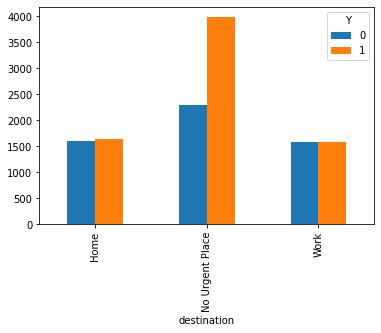

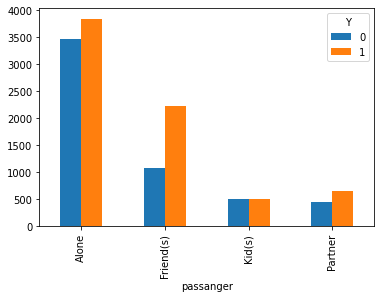

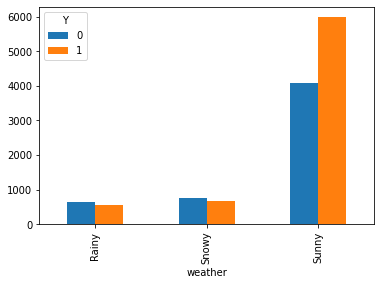

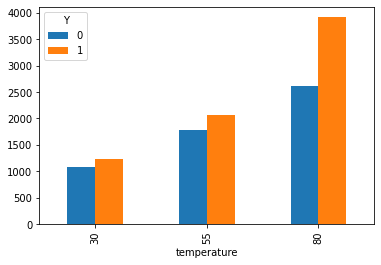

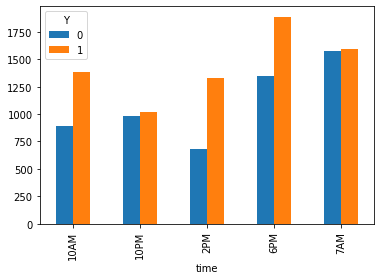

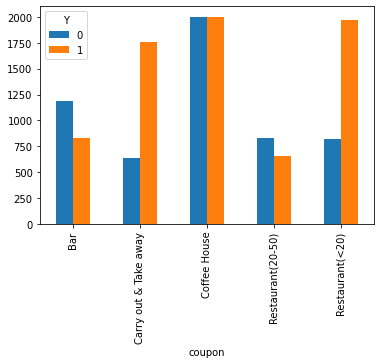

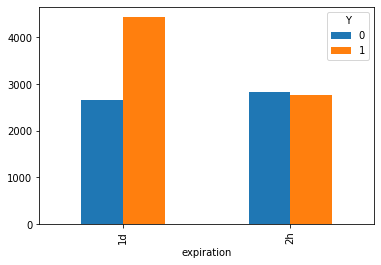

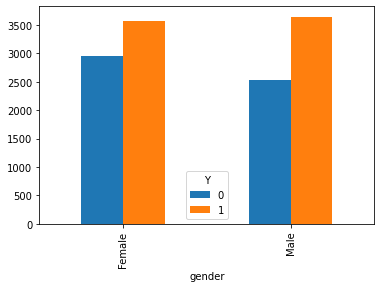

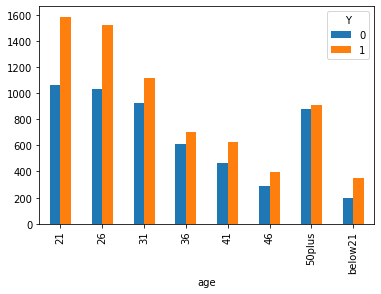

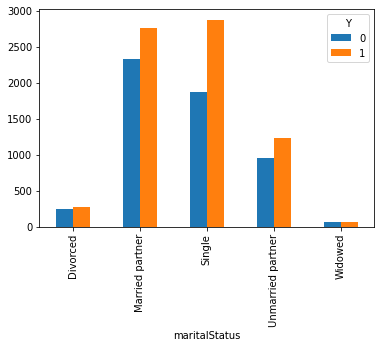

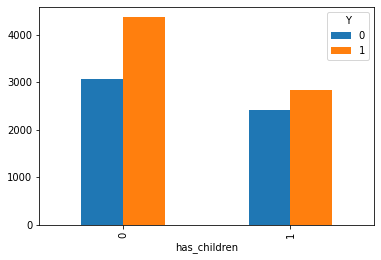

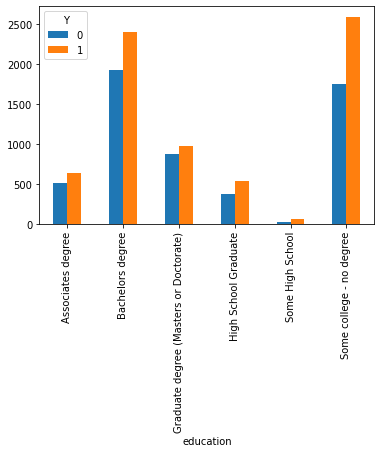

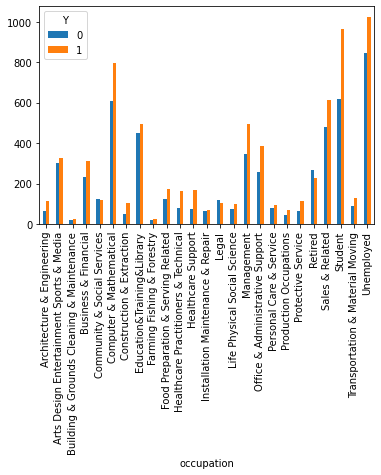

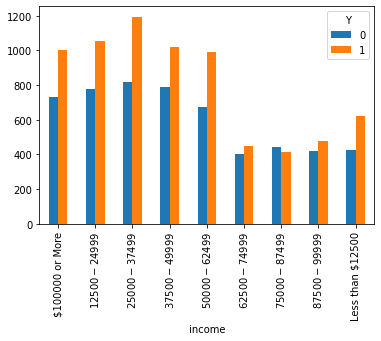

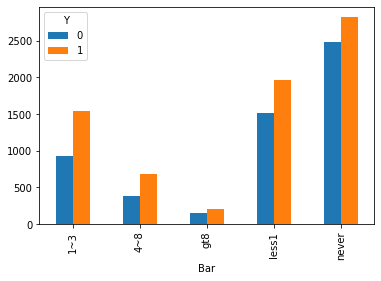

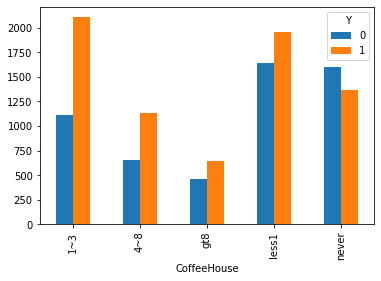

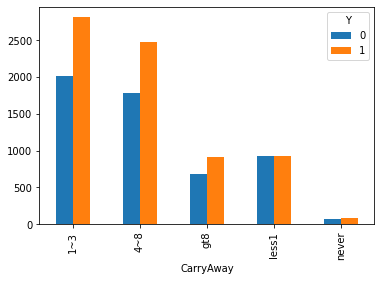

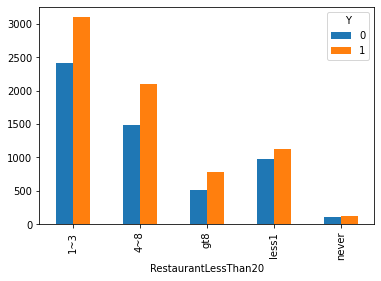

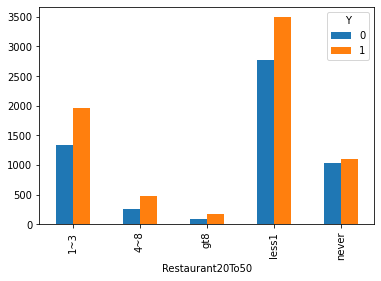

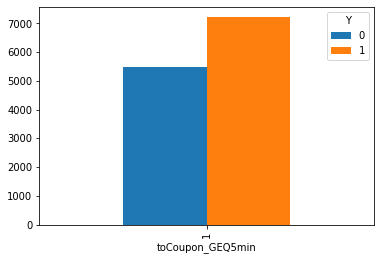

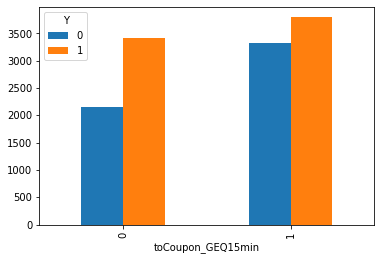

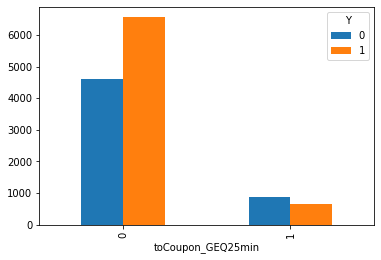

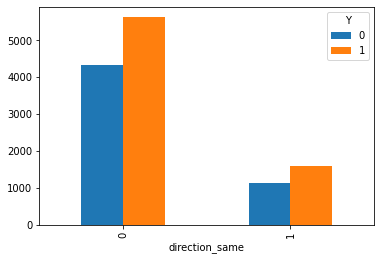

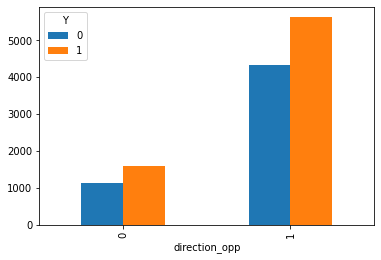

In [13]:
count = 0
target = df.columns[-1]
for cat_val in df.columns:
  if cat_val == target: 
    continue
  temp_df = df.loc[:, [cat_val, target]]  
  temp_df = temp_df.groupby([cat_val, target]).size().reset_index(name='count')
  pivot_df = pd.pivot_table(temp_df, values='count', index=cat_val, columns=target)
  pivot_df.plot(kind='bar')
  count += 1

<a name='3'></a>
## 3 - Feature Engineering

<a name='3-1'></a>
### 3.1 -  Feature selection
We assume that the target and features are related only the confidence is above 95 percent. By observing the bottom row in the heatmap in section 2.2, those 3 columns, **toCoupon_GEQ5min, direction_same, direction_opp**, are removed as not meeting the confidence conditions.

In [14]:
df_droped = df.drop(columns = ['toCoupon_GEQ5min', 'direction_same', 'direction_opp'])
print(len(df.columns))
print(len(df_droped.columns))
# df_droped.to_csv('Clean_Data_0.csv')

25
22


<a name=3-2></a>
### 3.2 - Feature encoding

In [15]:
for i in df_droped.columns:
    print(i, df_droped[i].unique(), '\n')

destination ['No Urgent Place' 'Home' 'Work'] 

passanger ['Alone' 'Friend(s)' 'Kid(s)' 'Partner'] 

weather ['Sunny' 'Rainy' 'Snowy'] 

temperature [55 80 30] 

time ['2PM' '10AM' '6PM' '7AM' '10PM'] 

coupon ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)'] 

expiration ['1d' '2h'] 

gender ['Female' 'Male'] 

age ['21' '46' '26' '31' '41' '50plus' '36' 'below21'] 

maritalStatus ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed'] 

has_children [1 0] 

education ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School'] 

occupation ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Commu

#### 3.2.1 - Load dataset 

Numpy

In [16]:
def load_dataset(filename):
    data = read_csv(filename, header=None)
    dataset = data.values
    
    X = dataset[:, :-1]
    y = dataset[:,-1]
    
    X = X.astype(str)
    y = y.reshape((len(y), 1))
    return X, y

In [17]:
# Test 
file = files.upload()
X, y = load_dataset('Data_Dropped.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train

Saving Data_Dropped.csv to Data_Dropped (1).csv
(8879, 22) (3806, 22) (8879, 1) (3806, 1)


array([['1202.0', 'No Urgent Place', 'Kid(s)', ..., 'less1', '1', '0'],
       ['4173.0', 'No Urgent Place', 'Alone', ..., 'less1', '0', '0'],
       ['5842.0', 'Home', 'Alone', ..., '1~3', '0', '0'],
       ...,
       ['9844.0', 'Home', 'Alone', ..., 'less1', '1', '1'],
       ['10798.0', 'No Urgent Place', 'Friend(s)', ..., '4~8', '0', '0'],
       ['2731.0', 'Work', 'Alone', ..., '1~3', '0', '0']], dtype='<U41')

Pandas

In [18]:
df_droped.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0


In [19]:
target = ['Y']
XP = df_droped.drop(columns = target)
yP = df_droped[target]
XTrain, XTest, yTrain, yTest = train_test_split(XP, yP, test_size=0.3, random_state=0)
XTrain.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min
10812,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Female,31,Single,...,Graduate degree (Masters or Doctorate),Legal,$75000 - $87499,gt8,4~8,4~8,4~8,4~8,0,0
8643,Home,Partner,Sunny,80,6PM,Coffee House,1d,Female,26,Married partner,...,Bachelors degree,Unemployed,$87500 - $99999,1~3,less1,1~3,less1,less1,0,0
5931,Home,Alone,Sunny,80,10PM,Bar,1d,Female,21,Single,...,Some college - no degree,Student,Less than $12500,gt8,gt8,1~3,less1,never,1,0
7188,Home,Alone,Snowy,30,10PM,Restaurant(20-50),2h,Male,46,Single,...,Graduate degree (Masters or Doctorate),Computer & Mathematical,$37500 - $49999,never,gt8,1~3,4~8,less1,0,0
6279,Work,Alone,Sunny,55,7AM,Coffee House,1d,Male,36,Single,...,Some college - no degree,Computer & Mathematical,$37500 - $49999,less1,1~3,4~8,1~3,less1,1,0


<a name='3-2-2'></a>
#### 3.2.2 - Ordinal encoding

In [20]:
%pip install category_encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[Encoding categorical variables](https://kiwidamien.github.io/encoding-categorical-variables.html)\
[Target Encoding](https://medium.com/analytics-vidhya/target-encoding-vs-one-hot-encoding-with-simple-examples-276a7e7b3e64)

In [21]:
def ordinal_encoder(train, test, columns):
    oe = ce.OrdinalEncoder(cols=columns, return_df=True)
    train_transformed = oe.fit_transform(train)
    test_transformed = oe.transform(test)
    return train_transformed, test_transformed

In [22]:
print(df_droped.columns)
ordial_columns = ['age', 'education', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
XTrain_after_ordinal, XTest_after_ordinal = ordinal_encoder(XTrain, XTest, ordial_columns)
display(XTrain.head())
display(XTest.head())
display(XTrain_after_ordinal.head())
display(XTest_after_ordinal.head())

# Question: Are time, temprature the ordinal variables?

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'Y'],
      dtype='object')


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min
10812,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Female,31,Single,...,Graduate degree (Masters or Doctorate),Legal,$75000 - $87499,gt8,4~8,4~8,4~8,4~8,0,0
8643,Home,Partner,Sunny,80,6PM,Coffee House,1d,Female,26,Married partner,...,Bachelors degree,Unemployed,$87500 - $99999,1~3,less1,1~3,less1,less1,0,0
5931,Home,Alone,Sunny,80,10PM,Bar,1d,Female,21,Single,...,Some college - no degree,Student,Less than $12500,gt8,gt8,1~3,less1,never,1,0
7188,Home,Alone,Snowy,30,10PM,Restaurant(20-50),2h,Male,46,Single,...,Graduate degree (Masters or Doctorate),Computer & Mathematical,$37500 - $49999,never,gt8,1~3,4~8,less1,0,0
6279,Work,Alone,Sunny,55,7AM,Coffee House,1d,Male,36,Single,...,Some college - no degree,Computer & Mathematical,$37500 - $49999,less1,1~3,4~8,1~3,less1,1,0


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min
12370,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,26,Single,...,Bachelors degree,Unemployed,$12500 - $24999,1~3,less1,4~8,1~3,less1,0,0
8332,No Urgent Place,Kid(s),Sunny,55,2PM,Coffee House,1d,Female,41,Married partner,...,Graduate degree (Masters or Doctorate),Computer & Mathematical,$75000 - $87499,less1,4~8,gt8,1~3,less1,1,0
8917,No Urgent Place,Friend(s),Rainy,55,10PM,Restaurant(20-50),2h,Male,36,Single,...,Graduate degree (Masters or Doctorate),Unemployed,Less than $12500,never,less1,less1,4~8,less1,1,0
6057,Home,Alone,Sunny,55,10PM,Carry out & Take away,1d,Female,26,Single,...,High School Graduate,Unemployed,Less than $12500,less1,less1,4~8,1~3,never,1,1
10644,No Urgent Place,Alone,Rainy,55,10AM,Coffee House,1d,Male,21,Unmarried partner,...,Some college - no degree,Student,Less than $12500,less1,1~3,4~8,4~8,1~3,1,0


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min
10812,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Female,1,Single,...,1,Legal,1,1,1,1,1,1,0,0
8643,Home,Partner,Sunny,80,6PM,Coffee House,1d,Female,2,Married partner,...,2,Unemployed,2,2,2,2,2,2,0,0
5931,Home,Alone,Sunny,80,10PM,Bar,1d,Female,3,Single,...,3,Student,3,1,3,2,2,3,1,0
7188,Home,Alone,Snowy,30,10PM,Restaurant(20-50),2h,Male,4,Single,...,1,Computer & Mathematical,4,3,3,2,1,2,0,0
6279,Work,Alone,Sunny,55,7AM,Coffee House,1d,Male,5,Single,...,3,Computer & Mathematical,4,4,4,1,3,2,1,0


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min
12370,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,2,Single,...,2,Unemployed,6,2,2,1,3,2,0,0
8332,No Urgent Place,Kid(s),Sunny,55,2PM,Coffee House,1d,Female,7,Married partner,...,1,Computer & Mathematical,1,4,1,3,3,2,1,0
8917,No Urgent Place,Friend(s),Rainy,55,10PM,Restaurant(20-50),2h,Male,5,Single,...,1,Unemployed,3,3,2,5,1,2,1,0
6057,Home,Alone,Sunny,55,10PM,Carry out & Take away,1d,Female,2,Single,...,5,Unemployed,3,4,2,1,3,3,1,1
10644,No Urgent Place,Alone,Rainy,55,10AM,Coffee House,1d,Male,3,Unmarried partner,...,3,Student,3,4,4,1,1,4,1,0


In [23]:
def ordinal_encoding(clean_df):
    frequency_map = {
        'never': 0,
        'less1': 1,
        '1~3': 2,
        '4~8': 3,
        'gt8': 4
    }
    
    age_map = {
        'below21': 0,
        '21': 1,
        '26': 2,
        '31': 3,
        '36': 4,
        '41': 5,
        '46': 6,
        '50plus': 7
    }
    
    income_map = {
        'Less than $12500': 0,
        '$12500 - $24999': 1,
        '$25000 - $37499': 2,
        '$37500 - $49999': 3,
        '$50000 - $62499': 4,
        '$62500 - $74999': 5,
        '$75000 - $87499': 6,
        '$87500 - $99999': 7,
        '$100000 or More': 8
    }
    
    frequency_cols = ['Restaurant20To50', 'RestaurantLessThan20',
                      'CarryAway', 'CoffeeHouse', 'Bar']

    
    education_map = {
        'Some High School': 0, 
        'High School Graduate': 1,
        'Some college - no degree': 2,
        'Associates degree': 3,
        'Bachelors degree': 4,
        'Graduate degree (Masters or Doctorate)': 5
    }
        
    
    for col in frequency_cols:
        clean_df[col] = clean_df[col].map(frequency_map)
    clean_df.age = clean_df.age.map(age_map)
    clean_df.income = clean_df.income.map(income_map)
    clean_df.education = clean_df.education.map(education_map)

    return clean_df

In [24]:
df_droped.education.unique()

array(['Some college - no degree', 'Bachelors degree',
       'Associates degree', 'High School Graduate',
       'Graduate degree (Masters or Doctorate)', 'Some High School'],
      dtype=object)

In [25]:
df_droped.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0


<a name = '3-2-2'></a>
#### 3.2.2 - One hot encoding

In [26]:
from sklearn.preprocessing import OneHotEncoder


def one_hot_encoding(train, test, columns):
    oe = ce.OneHotEncoder(cols=columns, return_df=True)
    train_transformed = oe.fit_transform(train)
    test_transformed = oe.transform(test)
    return train_transformed, test_transformed


In [27]:
train_after_one_hot_encoding, test_after_one_hot_encoding = one_hot_encoding(XTrain, XTest, columns=[i for i in XTrain.columns if i not in ordial_columns])
display(train_after_one_hot_encoding.head())
display(test_after_one_hot_encoding.head())
display(train_after_one_hot_encoding.age)



,destination_1,destination_2,destination_3,passanger_1,passanger_2,passanger_3,passanger_4,weather_1,weather_2,weather_3,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min_1,toCoupon_GEQ15min_2,toCoupon_GEQ25min_1,toCoupon_GEQ25min_2
10812,1,0,0,1,0,0,0,1,0,0,...,$75000 - $87499,gt8,4~8,4~8,4~8,4~8,1,0,1,0
8643,1,0,0,0,1,0,0,1,0,0,...,$87500 - $99999,1~3,less1,1~3,less1,less1,1,0,1,0
5931,1,0,0,1,0,0,0,1,0,0,...,Less than $12500,gt8,gt8,1~3,less1,never,0,1,1,0
7188,1,0,0,1,0,0,0,0,1,0,...,$37500 - $49999,never,gt8,1~3,4~8,less1,1,0,1,0
6279,0,1,0,1,0,0,0,1,0,0,...,$37500 - $49999,less1,1~3,4~8,1~3,less1,0,1,1,0


,destination_1,destination_2,destination_3,passanger_1,passanger_2,passanger_3,passanger_4,weather_1,weather_2,weather_3,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min_1,toCoupon_GEQ15min_2,toCoupon_GEQ25min_1,toCoupon_GEQ25min_2
12370,0,0,1,0,0,1,0,1,0,0,...,$12500 - $24999,1~3,less1,4~8,1~3,less1,1,0,1,0
8332,0,0,1,0,0,0,1,1,0,0,...,$75000 - $87499,less1,4~8,gt8,1~3,less1,0,1,1,0
8917,0,0,1,0,0,1,0,0,0,1,...,Less than $12500,never,less1,less1,4~8,less1,0,1,1,0
6057,1,0,0,1,0,0,0,1,0,0,...,Less than $12500,less1,less1,4~8,1~3,never,0,1,0,1
10644,0,0,1,1,0,0,0,0,0,1,...,Less than $12500,less1,1~3,4~8,4~8,1~3,0,1,1,0


10812         31
8643          26
5931          21
7188          46
6279          36
          ...   
4859     below21
3264          21
9845      50plus
10799         31
2732          21
Name: age, Length: 8878, dtype: object

<a name = '3-2-3'></a>
#### 3.2.3 - Frequency and target encoding

In [28]:
def target_encoding(train, ytrain, test, columns):
    ytrain = ytrain.astype(float)
    oe = ce.TargetEncoder(return_df=True)

    train_transformed = oe.fit_transform(train[columns], ytrain[ytrain.columns])
    test_transformed = oe.transform(test)
    return train_transformed, test_transformed

In [29]:
train_after_target_encoding, test_after_target_encoding = target_encoding(XTrain, yTrain, XTest, columns=list(XTrain.columns))
display(train_after_target_encoding.head())
display(test_after_target_encoding.head())

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min
10812,0.510348,0.529851,0.598475,0.605884,0.589934,0.448598,0.634966,0.548189,0.552669,0.613293,...,0.530531,0.457516,0.477462,0.589844,0.639450,0.594559,0.591053,0.660194,0.624356,0.593694
8643,0.510348,0.598952,0.598475,0.605884,0.589934,0.501625,0.634966,0.548189,0.605469,0.546915,...,0.561335,0.561051,0.548031,0.631243,0.547940,0.582218,0.547260,0.567123,0.624356,0.593694
5931,0.510348,0.529851,0.598475,0.605884,0.516667,0.416667,0.634966,0.548189,0.598493,0.613293,...,0.603527,0.619262,0.611983,0.589844,0.592497,0.582218,0.547260,0.523777,0.535643,0.593694
7188,0.510348,0.529851,0.476483,0.536050,0.516667,0.448598,0.498476,0.602128,0.606491,0.613293,...,0.530531,0.564386,0.571649,0.538194,0.592497,0.582218,0.591053,0.567123,0.624356,0.593694
6279,0.505000,0.529851,0.598475,0.542857,0.505000,0.501625,0.634966,0.602128,0.543897,0.613293,...,0.603527,0.564386,0.571649,0.570778,0.662571,0.594559,0.568105,0.567123,0.535643,0.593694


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min
12370,0.642160,0.677783,0.598475,0.605884,0.589934,0.708208,0.498476,0.602128,0.605469,0.613293,...,0.561335,0.561051,0.572537,0.631243,0.547940,0.594559,0.568105,0.567123,0.624356,0.593694
8332,0.642160,0.532213,0.598475,0.542857,0.662906,0.501625,0.634966,0.548189,0.567568,0.546915,...,0.530531,0.564386,0.477462,0.570778,0.639450,0.572727,0.568105,0.567123,0.535643,0.593694
8917,0.642160,0.677783,0.483476,0.542857,0.516667,0.448598,0.498476,0.602128,0.543897,0.613293,...,0.530531,0.561051,0.611983,0.538194,0.547940,0.511284,0.591053,0.567123,0.535643,0.593694
6057,0.510348,0.529851,0.598475,0.542857,0.516667,0.747140,0.634966,0.548189,0.605469,0.613293,...,0.586151,0.561051,0.611983,0.570778,0.547940,0.594559,0.568105,0.523777,0.535643,0.430077
10644,0.642160,0.529851,0.483476,0.542857,0.619436,0.501625,0.634966,0.602128,0.598493,0.571155,...,0.603527,0.619262,0.611983,0.570778,0.662571,0.594559,0.591053,0.594595,0.535643,0.593694


<a name = '3-2-4'></a>
#### 3.2.4 - Embedded encoding

[Ref](https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/)

In [30]:
from numpy import unique
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import concatenate
from tensorflow.keras.utils import plot_model
 
# load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = read_csv(filename, header=0).iloc[:,1:]
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, :-1]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	# reshape target to be a 2d array
	y = y.reshape((len(y), 1))
	return X, y
 
# prepare input data
def prepare_inputs(X_train, X_test):
	X_train_enc, X_test_enc = list(), list()
	# label encode each column
	for i in range(X_train.shape[1]):
		le = LabelEncoder()
		le.fit(X_train[:, i])
		# encode
		train_enc = le.transform(X_train[:, i])
		test_enc = le.transform(X_test[:, i])
		# store
		X_train_enc.append(train_enc)
		X_test_enc.append(test_enc)
	return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc
 
# load the dataset
X_e, y_e = load_dataset('Data_Dropped.csv')
display(X_e, y_e)
# split into train and test sets
X_Train, X_Test, y_Train, y_Test = train_test_split(X_e, y_e, test_size=0.3, random_state=0)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_Train, X_Test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_Train, y_Test)
# make output 3d
y_train_enc = y_train_enc.reshape((len(y_train_enc), 1, 1))
y_test_enc = y_test_enc.reshape((len(y_test_enc), 1, 1))

# prepare each input head
in_layers = list()
em_layers = list()
for i in range(len(X_train_enc)):
	# calculate the number of unique inputs
	n_labels = len(unique(X_train_enc[i]))
	# define input layer
	in_layer = Input(shape=(1,))
	# define embedding layer
	em_layer = Embedding(n_labels, 10)(in_layer)
	# store layers
	in_layers.append(in_layer)
	em_layers.append(em_layer)
# concat all embeddings
merge = concatenate(em_layers)
dense = Dense(10, activation='relu', kernel_initializer='he_normal')(merge)
output = Dense(1, activation='sigmoid')(dense)
model = Model(inputs=in_layers, outputs=output)
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# plot graph
plot_model(model, show_shapes=True, to_file='embeddings.png')
# fit the keras model on the dataset
model.fit(X_train_enc, y_train_enc, epochs=20, batch_size=16, verbose=2)
# evaluate the keras model
_, accuracy = model.evaluate(X_test_enc, y_test_enc, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

array([['No Urgent Place', 'Alone', 'Sunny', ..., '1~3', '0', '0'],
       ['No Urgent Place', 'Friend(s)', 'Sunny', ..., '1~3', '0', '0'],
       ['No Urgent Place', 'Friend(s)', 'Sunny', ..., '1~3', '1', '0'],
       ...,
       ['Work', 'Alone', 'Snowy', ..., '1~3', '0', '0'],
       ['Work', 'Alone', 'Snowy', ..., '1~3', '1', '1'],
       ['Work', 'Alone', 'Sunny', ..., '1~3', '0', '0']], dtype='<U41')

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=object)

Epoch 1/20
555/555 - 11s - loss: 0.6217 - accuracy: 0.6580 - 11s/epoch - 19ms/step
Epoch 2/20
555/555 - 3s - loss: 0.5869 - accuracy: 0.6960 - 3s/epoch - 5ms/step
Epoch 3/20
555/555 - 2s - loss: 0.5795 - accuracy: 0.7031 - 2s/epoch - 4ms/step
Epoch 4/20
555/555 - 2s - loss: 0.5740 - accuracy: 0.7024 - 2s/epoch - 4ms/step
Epoch 5/20
555/555 - 2s - loss: 0.5699 - accuracy: 0.7067 - 2s/epoch - 4ms/step
Epoch 6/20
555/555 - 3s - loss: 0.5672 - accuracy: 0.7085 - 3s/epoch - 5ms/step
Epoch 7/20
555/555 - 2s - loss: 0.5634 - accuracy: 0.7105 - 2s/epoch - 4ms/step
Epoch 8/20
555/555 - 1s - loss: 0.5594 - accuracy: 0.7158 - 1s/epoch - 3ms/step
Epoch 9/20
555/555 - 2s - loss: 0.5555 - accuracy: 0.7162 - 2s/epoch - 3ms/step
Epoch 10/20
555/555 - 2s - loss: 0.5515 - accuracy: 0.7255 - 2s/epoch - 3ms/step
Epoch 11/20
555/555 - 1s - loss: 0.5484 - accuracy: 0.7217 - 1s/epoch - 3ms/step
Epoch 12/20
555/555 - 1s - loss: 0.5431 - accuracy: 0.7269 - 1s/epoch - 3ms/step
Epoch 13/20
555/555 - 1s - loss: 0

In [31]:
display(merge)

<KerasTensor: shape=(None, 1, 210) dtype=float32 (created by layer 'concatenate')>

<a name = '4'></a>
# 4 - Classifiaction Models

<a name = '4-1'></a>
### 4.1 - Logistic regression


In [32]:
# Target Encoding
%pip install dmba
from sklearn.linear_model import LogisticRegression
from dmba import classificationSummary, gainsChart, liftChart

display(train_after_target_encoding)
lr = LogisticRegression()
yTrain = yTrain.astype('category')
yTest = yTest.astype('category')
lr.fit(train_after_target_encoding, yTrain)
classificationSummary(yTest, lr.predict(test_after_target_encoding))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
no display found. Using non-interactive Agg backend


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min
10812,0.510348,0.529851,0.598475,0.605884,0.589934,0.448598,0.634966,0.548189,0.552669,0.613293,...,0.530531,0.457516,0.477462,0.589844,0.639450,0.594559,0.591053,0.660194,0.624356,0.593694
8643,0.510348,0.598952,0.598475,0.605884,0.589934,0.501625,0.634966,0.548189,0.605469,0.546915,...,0.561335,0.561051,0.548031,0.631243,0.547940,0.582218,0.547260,0.567123,0.624356,0.593694
5931,0.510348,0.529851,0.598475,0.605884,0.516667,0.416667,0.634966,0.548189,0.598493,0.613293,...,0.603527,0.619262,0.611983,0.589844,0.592497,0.582218,0.547260,0.523777,0.535643,0.593694
7188,0.510348,0.529851,0.476483,0.536050,0.516667,0.448598,0.498476,0.602128,0.606491,0.613293,...,0.530531,0.564386,0.571649,0.538194,0.592497,0.582218,0.591053,0.567123,0.624356,0.593694
6279,0.505000,0.529851,0.598475,0.542857,0.505000,0.501625,0.634966,0.602128,0.543897,0.613293,...,0.603527,0.564386,0.571649,0.570778,0.662571,0.594559,0.568105,0.567123,0.535643,0.593694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,0.510348,0.529851,0.598475,0.605884,0.589934,0.501625,0.634966,0.602128,0.651042,0.613293,...,0.603527,0.619262,0.519793,0.538194,0.662571,0.594559,0.568105,0.567123,0.624356,0.593694
3264,0.510348,0.529851,0.598475,0.542857,0.589934,0.448598,0.634966,0.548189,0.598493,0.546915,...,0.603527,0.561051,0.602143,0.538194,0.547940,0.582218,0.547260,0.567123,0.535643,0.593694
9845,0.510348,0.529851,0.476483,0.536050,0.516667,0.708208,0.498476,0.548189,0.509976,0.546915,...,0.561335,0.570861,0.611251,0.631243,0.639450,0.511284,0.568105,0.567123,0.535643,0.430077
10799,0.642160,0.677783,0.598475,0.605884,0.516667,0.416667,0.634966,0.548189,0.552669,0.613293,...,0.530531,0.457516,0.477462,0.589844,0.639450,0.594559,0.591053,0.660194,0.535643,0.593694


Confusion Matrix (Accuracy 0.6737)

       Prediction
Actual    0    1
     0  931  765
     1  477 1633


In [33]:
# One Hot Encoding 
XTrain_only_one_hot, XTest_only_one_hot = one_hot_encoding(XTrain, XTest, columns=XTrain.columns)
display(XTrain_only_one_hot.head())
lr.fit(XTrain_only_one_hot, yTrain)
classificationSummary(yTest, lr.predict(XTest_only_one_hot))

,destination_1,destination_2,destination_3,passanger_1,passanger_2,passanger_3,passanger_4,weather_1,weather_2,weather_3,...,RestaurantLessThan20_5,Restaurant20To50_1,Restaurant20To50_2,Restaurant20To50_3,Restaurant20To50_4,Restaurant20To50_5,toCoupon_GEQ15min_1,toCoupon_GEQ15min_2,toCoupon_GEQ25min_1,toCoupon_GEQ25min_2
10812,1,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
8643,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
5931,1,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1,0
7188,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
6279,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0


Confusion Matrix (Accuracy 0.6671)

       Prediction
Actual    0    1
     0  930  766
     1  501 1609


In [34]:
# Ordinal Encoding 
XTrain_only_ordinal, XTest_only_ordinal = ordinal_encoder(XTrain, XTest, columns=XTrain.columns)
display(XTrain_only_ordinal.head())
lr.fit(XTrain_only_ordinal, yTrain)
classificationSummary(yTest, lr.predict(XTest_only_ordinal))

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min
10812,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8643,1,2,1,1,1,2,1,1,2,2,...,2,2,2,2,2,2,2,2,1,1
5931,1,1,1,1,2,3,1,1,3,1,...,3,3,3,1,3,2,2,3,2,1
7188,1,1,2,2,2,1,2,2,4,1,...,1,4,4,3,3,2,1,2,1,1
6279,2,1,1,3,3,2,1,2,5,1,...,3,4,4,4,4,1,3,2,2,1


Confusion Matrix (Accuracy 0.6382)

       Prediction
Actual    0    1
     0  816  880
     1  497 1613


In [35]:
# One Hot Encoding + Ordianal Encoding
yTrain, yTest = yTrain.astype('int'), yTest.astype('int')
XTrain_after_ordinal, XTest_after_ordinal = ordinal_encoder(XTrain, XTest, ordial_columns)
train_after_one_hot_encoding, test_after_one_hot_encoding = one_hot_encoding(XTrain_after_ordinal, XTest_after_ordinal, columns=[i for i in XTrain.columns if i not in ordial_columns])
display(train_after_one_hot_encoding.head())
display(test_after_one_hot_encoding)

lr.fit(train_after_one_hot_encoding, yTrain)
classificationSummary(yTest, lr.predict(test_after_one_hot_encoding))


## Ordinal encoding with some order assignment
target = ['Y']
XP = df_droped.drop(columns = target)
yP = df_droped[target]
XTrain, XTest, yTrain, yTest = train_test_split(XP, yP, test_size=0.3, random_state=0)
display(XTrain.head())

yTrain, yTest = yTrain.astype('int'), yTest.astype('int')
XTrain_after_ordinal_o = ordinal_encoding(XTrain)
XTest_after_ordinal_o = ordinal_encoding(XTest)
display(XTrain.head())
display(XTrain_after_ordinal_o.isnull().sum())
display(XTest_after_ordinal_o.isnull().sum())
train_after_one_hot_encoding_n, test_after_one_hot_encoding_n = one_hot_encoding(XTrain_after_ordinal_o, XTest_after_ordinal_o, columns=[i for i in XTrain.columns if i not in ordial_columns])
display(train_after_one_hot_encoding_n.head())
display(test_after_one_hot_encoding_n)

lr.fit(train_after_one_hot_encoding_n, yTrain)
classificationSummary(yTest, lr.predict(test_after_one_hot_encoding_n))

,destination_1,destination_2,destination_3,passanger_1,passanger_2,passanger_3,passanger_4,weather_1,weather_2,weather_3,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min_1,toCoupon_GEQ15min_2,toCoupon_GEQ25min_1,toCoupon_GEQ25min_2
10812,1,0,0,1,0,0,0,1,0,0,...,1,1,1,1,1,1,1,0,1,0
8643,1,0,0,0,1,0,0,1,0,0,...,2,2,2,2,2,2,1,0,1,0
5931,1,0,0,1,0,0,0,1,0,0,...,3,1,3,2,2,3,0,1,1,0
7188,1,0,0,1,0,0,0,0,1,0,...,4,3,3,2,1,2,1,0,1,0
6279,0,1,0,1,0,0,0,1,0,0,...,4,4,4,1,3,2,0,1,1,0


,destination_1,destination_2,destination_3,passanger_1,passanger_2,passanger_3,passanger_4,weather_1,weather_2,weather_3,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min_1,toCoupon_GEQ15min_2,toCoupon_GEQ25min_1,toCoupon_GEQ25min_2
12370,0,0,1,0,0,1,0,1,0,0,...,6,2,2,1,3,2,1,0,1,0
8332,0,0,1,0,0,0,1,1,0,0,...,1,4,1,3,3,2,0,1,1,0
8917,0,0,1,0,0,1,0,0,0,1,...,3,3,2,5,1,2,0,1,1,0
6057,1,0,0,1,0,0,0,1,0,0,...,3,4,2,1,3,3,0,1,0,1
10644,0,0,1,1,0,0,0,0,0,1,...,3,4,4,1,1,4,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1590,0,0,1,0,0,1,0,1,0,0,...,5,4,4,2,4,3,1,0,1,0
12027,0,0,1,1,0,0,0,1,0,0,...,2,2,2,5,2,2,1,0,1,0
11690,0,0,1,0,0,0,1,1,0,0,...,4,3,3,1,3,2,1,0,1,0
1398,0,0,1,0,0,1,0,1,0,0,...,6,3,2,2,1,2,0,1,1,0


Confusion Matrix (Accuracy 0.6650)

       Prediction
Actual    0    1
     0  912  784
     1  491 1619


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min
10812,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Female,31,Single,...,Graduate degree (Masters or Doctorate),Legal,$75000 - $87499,gt8,4~8,4~8,4~8,4~8,0,0
8643,Home,Partner,Sunny,80,6PM,Coffee House,1d,Female,26,Married partner,...,Bachelors degree,Unemployed,$87500 - $99999,1~3,less1,1~3,less1,less1,0,0
5931,Home,Alone,Sunny,80,10PM,Bar,1d,Female,21,Single,...,Some college - no degree,Student,Less than $12500,gt8,gt8,1~3,less1,never,1,0
7188,Home,Alone,Snowy,30,10PM,Restaurant(20-50),2h,Male,46,Single,...,Graduate degree (Masters or Doctorate),Computer & Mathematical,$37500 - $49999,never,gt8,1~3,4~8,less1,0,0
6279,Work,Alone,Sunny,55,7AM,Coffee House,1d,Male,36,Single,...,Some college - no degree,Computer & Mathematical,$37500 - $49999,less1,1~3,4~8,1~3,less1,1,0


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min
10812,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Female,3,Single,...,5,Legal,6,4,3,3,3,3,0,0
8643,Home,Partner,Sunny,80,6PM,Coffee House,1d,Female,2,Married partner,...,4,Unemployed,7,2,1,2,1,1,0,0
5931,Home,Alone,Sunny,80,10PM,Bar,1d,Female,1,Single,...,2,Student,0,4,4,2,1,0,1,0
7188,Home,Alone,Snowy,30,10PM,Restaurant(20-50),2h,Male,6,Single,...,5,Computer & Mathematical,3,0,4,2,3,1,0,0
6279,Work,Alone,Sunny,55,7AM,Coffee House,1d,Male,4,Single,...,2,Computer & Mathematical,3,1,2,3,2,1,1,0


destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
dtype: int64

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
dtype: int64

,destination_1,destination_2,destination_3,passanger_1,passanger_2,passanger_3,passanger_4,weather_1,weather_2,weather_3,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min_1,toCoupon_GEQ15min_2,toCoupon_GEQ25min_1,toCoupon_GEQ25min_2
10812,1,0,0,1,0,0,0,1,0,0,...,6,4,3,3,3,3,1,0,1,0
8643,1,0,0,0,1,0,0,1,0,0,...,7,2,1,2,1,1,1,0,1,0
5931,1,0,0,1,0,0,0,1,0,0,...,0,4,4,2,1,0,0,1,1,0
7188,1,0,0,1,0,0,0,0,1,0,...,3,0,4,2,3,1,1,0,1,0
6279,0,1,0,1,0,0,0,1,0,0,...,3,1,2,3,2,1,0,1,1,0


,destination_1,destination_2,destination_3,passanger_1,passanger_2,passanger_3,passanger_4,weather_1,weather_2,weather_3,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min_1,toCoupon_GEQ15min_2,toCoupon_GEQ25min_1,toCoupon_GEQ25min_2
12370,0,0,1,0,0,1,0,1,0,0,...,1,2,1,3,2,1,1,0,1,0
8332,0,0,1,0,0,0,1,1,0,0,...,6,1,3,4,2,1,0,1,1,0
8917,0,0,1,0,0,1,0,0,0,1,...,0,0,1,1,3,1,0,1,1,0
6057,1,0,0,1,0,0,0,1,0,0,...,0,1,1,3,2,0,0,1,0,1
10644,0,0,1,1,0,0,0,0,0,1,...,0,1,2,3,3,2,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1590,0,0,1,0,0,1,0,1,0,0,...,8,1,2,2,4,0,1,0,1,0
12027,0,0,1,1,0,0,0,1,0,0,...,7,2,1,1,1,1,1,0,1,0
11690,0,0,1,0,0,0,1,1,0,0,...,3,0,4,3,2,1,1,0,1,0
1398,0,0,1,0,0,1,0,1,0,0,...,1,0,1,2,3,1,0,1,1,0


Confusion Matrix (Accuracy 0.6679)

       Prediction
Actual    0    1
     0  934  762
     1  502 1608


In [36]:
# Embedded Encoding
# We have tested previously using neural network, how to apply to logistic 
# regression here?
# It seems that the encoder has changed the dimension of the training data
# so I am not sure if they are applicable to the logistic regression.
display(len(em_layers))
em_layers

df_droped.shape[1]

21

22

By hand 

In [ ]:
class LogisticRegression:
    
    def __init__(self,X,y, learningRate = 0.00001, tolerance = 0.00005, maxIteration = 5000):
        self.X = X
        self.y =y
        self.tolerance = tolerance
        self.maxIteration = maxIteration
        self.learningRate = learningRate

    def splitData(self):

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

        return X_train, y_train, X_valid, y_valid, X_test, y_test 

    def add_x0(self, X):
        return np.column_stack([np.ones([X.shape[0], 1]), X])
        
    def sigmoid(self,z):
        sig = 1/(1+np.exp(-z))
        return sig
    
    def costFunction(self, X, y):
        pred_ =np.log(np.ones(X.shape[0])+np.exp(X.dot(self.w))) - X.dot(self.w).dot(y)
        cost = pred_.sum( )
        return cost
    
    def gradient(self,X,y):
        sigmoid = self.sigmoid(X.dot(self.w))
        grad = (sigmoid -y ).dot(X)
        return grad
    
    def gradientDescent(self, X, y):
        errors = []
        last = float('inf')
        
        for i in range(self.maxIteration):
            self.w = self.w - self.learningRate*self.gradient(X,y)
            curr = self.costFunction(X,y)
            
            diff = last - curr
            last - curr
            
            errors.append(curr)
            
            if diff < self.tolerance:
                print("The model stopped Learning")
                break
        # self.plot_cost(errors)
        
    def predict(self,X):
        pred = self.sigmoid(X.dot(self.w))
        return np.around(pred)
        
    def evaluate(self, y, y_hat):
        
        y = (y == 1)
        y_hat = (y_hat == 1)
        
        accuracy = (y == y_hat).sum() / y.size
        precision = (y & y_hat).sum() / y_hat.sum()
        recall = (y & y_hat).sum() / y.sum()

        print("Accuracy is", accuracy)
        print('Recall is', recall)
        print('precision is ', precision)
        
        return recall, precision, accuracy
    
    def fit(self):

        X_train, y_train, X_valid, y_valid, X_test, y_test = self.splitData()
        self.w = np.ones(X_train.shape[1], dtype = np.float64)*0
        self.gradientDescent(X_train, y_train)
        
        #print(self.w)
        
        y_hat_train = self.predict(X_train)
        recall, precision, accuracy = self.evaluate(y_train,y_hat_train)


    def validation(self):
        X_train, y_train, X_valid, y_valid, X_test, y_test = self.splitData()
        y_hat_valid = self.predict(X_valid)
        recall, precision, accuracy  = self.evaluate(y_valid, y_hat_valid)

    def test(self):
        X_train, y_train, X_valid, y_valid, X_test, y_test = self.splitData()
        y_hat_test = self.predict(X_test)
        recall, precision, accuracy  = self.evaluate(y_test, y_hat_test)

### Random Forest

#### Decision Tree, Random Forest with ordinal data

In [37]:

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion="gini",
        max_depth=None, max_features="auto", max_leaf_nodes=None,
        min_samples_leaf=1,
        min_samples_split=2, min_weight_fraction_leaf=0.0,
        n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
        verbose=0, warm_start=False)

rf.fit(XTrain_only_ordinal, yTrain)

classificationSummary(yTest, rf.predict(XTest_only_ordinal))

Confusion Matrix (Accuracy 0.7147)

       Prediction
Actual    0    1
     0 1182  514
     1  572 1538


#### Decision Tree with mixture of one hot and oridinal data

In [38]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion="gini", max_depth=None, max_features="auto", max_leaf_nodes=None,
min_samples_leaf=1,
min_samples_split=2, min_weight_fraction_leaf=0.0,
n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
verbose=0, warm_start=False)

rf.fit(train_after_one_hot_encoding_n, yTrain)
classificationSummary(yTest, rf.predict(test_after_one_hot_encoding_n))

Confusion Matrix (Accuracy 0.6913)

       Prediction
Actual    0    1
     0 1134  562
     1  613 1497


In [39]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion="gini", max_depth=None, max_features="auto", max_leaf_nodes=None,
min_samples_leaf=1,
min_samples_split=2, min_weight_fraction_leaf=0.0,
n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
verbose=0, warm_start=False)

rf.fit(train_after_target_encoding, yTrain)
classificationSummary(yTest, rf.predict(test_after_target_encoding))

Confusion Matrix (Accuracy 0.7097)

       Prediction
Actual    0    1
     0 1169  527
     1  578 1532


### 4.2 - Deep Neural Network

#### Pakages

In [40]:
import tensorflow as tf
from tensorflow import keras

#### Just one layer -  Baseline

In [41]:
#  parameters
num_epochs = 200
batch_size = 128
verbose = 1
n_classes = 2
n_hiddens = 128
validation_split = 0.2

# data 
x_train_neuron = train_after_one_hot_encoding_n
y_train_neuron = yTrain
x_test_neuron = test_after_one_hot_encoding_n
y_test_neuron = yTest
print(x_train_neuron.shape, y_train_neuron.shape, x_test_neuron.shape, y_test_neuron.shape)

# x_train_neuron.to_csv('clean_x_train.csv')
# y_train_neuron.to_csv('clean_y_train.csv')
# x_test_neuron.to_csv('clean_x_test.csv')
# y_test_neuron.to_csv('clean_y_test.csv')

# No need to change the data types, or normalizations and one hot encoding 
# for the target class

# model
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(n_classes, input_shape=(x_train_neuron.shape[1],),
            name = 'dense_layer', activation='softmax'))

# compile the model
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train_neuron, y_train_neuron, batch_size=batch_size, epochs=num_epochs,
            verbose=verbose, validation_split=validation_split)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test_neuron, y_test_neuron)
print('Test accuracy: ', test_acc)


(8878, 71) (8878, 1) (3806, 71) (3806, 1)
Epoch 1/200
56/56 [==============================] - 1s 10ms/step - loss: 0.7284 - accuracy: 0.5363 - val_loss: 0.6889 - val_accuracy: 0.5749
Epoch 2/200
56/56 [==============================] - 0s 4ms/step - loss: 0.6944 - accuracy: 0.5689 - val_loss: 0.6700 - val_accuracy: 0.5980
Epoch 3/200
56/56 [==============================] - 0s 6ms/step - loss: 0.6733 - accuracy: 0.5904 - val_loss: 0.6558 - val_accuracy: 0.6216
Epoch 4/200
56/56 [==============================] - 0s 5ms/step - loss: 0.6594 - accuracy: 0.6121 - val_loss: 0.6466 - val_accuracy: 0.6441
Epoch 5/200
56/56 [==============================] - 0s 4ms/step - loss: 0.6490 - accuracy: 0.6246 - val_loss: 0.6410 - val_accuracy: 0.6470
Epoch 6/200
56/56 [==============================] - 0s 5ms/step - loss: 0.6419 - accuracy: 0.6348 - val_loss: 0.6329 - val_accuracy: 0.6689
Epoch 7/200
56/56 [==============================] - 0s 5ms/step - loss: 0.6365 - accuracy: 0.6446 - val_loss: 

#### Add Hidden layers

In [ ]:
# model
model = tf.keras.models.Sequential()

model.add(keras.layers.Dense(n_hiddens, input_shape=(x_train_neuron.shape[1],), 
            name='dense_layer1', activation='relu'))

model.add(keras.layers.Dense(n_hiddens,
name='dense_layer_2', activation='relu'))

model.add(keras.layers.Dense(n_classes,
name='dense_layer_3', activation='softmax'))

# Summary of the model.
model.summary()

# Compiling the model.
model.compile(optimizer='SGD',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

# Training the model.
model.fit(x_train_neuron, y_train_neuron, batch_size=batch_size, epochs=num_epochs,
verbose=verbose, validation_split=validation_split)

# Evaluating the model.
test_loss, test_acc = model.evaluate(x_test_neuron, y_test_neuron)
print('Test accuracy:', test_acc)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer1 (Dense)        (None, 128)               9216      
                                                                 
 dense_layer_2 (Dense)       (None, 128)               16512     
                                                                 
 dense_layer_3 (Dense)       (None, 2)                 258       
                                                                 
Total params: 25,986
Trainable params: 25,986
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
56/56 [==============================] - 1s 6ms/step - loss: 0.6961 - accuracy: 0.5525 - val_loss: 0.6683 - val_accuracy: 0.5907
Epoch 2/200
56/56 [==============================] - 0s 3ms/step - loss: 0.6628 - accuracy: 0.6073 - val_loss: 0.6543 - val_accuracy: 0.6137
Epoch 3/200
56/56 [=============

#### Dropout to avoid overfitting

In [ ]:
# model
Dropout = 0.3
model = tf.keras.models.Sequential()

model.add(keras.layers.Dense(n_hiddens, input_shape=(x_train_neuron.shape[1],), 
            name='dense_layer1', activation='relu'))

model.add(keras.layers.Dropout(Dropout))

model.add(keras.layers.Dense(n_hiddens,
name='dense_layer_2', activation='relu'))

model.add(keras.layers.Dropout(Dropout))

model.add(keras.layers.Dense(n_classes,
name='dense_layer_3', activation='softmax'))

# Summary of the model.
model.summary()

# Compiling the model.
model.compile(optimizer='SGD',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

# Training the model.
model.fit(x_train_neuron, y_train_neuron, batch_size=batch_size, epochs=num_epochs,
verbose=verbose, validation_split=validation_split)

# Evaluating the model.
test_loss, test_acc = model.evaluate(x_test_neuron, y_test_neuron)
print('Test accuracy:', test_acc)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer1 (Dense)        (None, 128)               9216      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_layer_2 (Dense)       (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_layer_3 (Dense)       (None, 2)                 258       
                                                                 
Total params: 25,986
Trainable params: 25,986
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
56/56 [==============================]

#### Different optimizers

In [ ]:
model.compile(optimizer='RMSProp',
loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model.
model.fit(x_train_neuron, y_train_neuron, batch_size=batch_size, epochs=num_epochs,
verbose=verbose, validation_split=validation_split)

# Evaluating the model.
test_loss, test_acc = model.evaluate(x_test_neuron, y_test_neuron)
print('Test accuracy:', test_acc)

Epoch 1/200
56/56 [==============================] - 1s 6ms/step - loss: 0.5523 - accuracy: 0.7199 - val_loss: 0.5619 - val_accuracy: 0.7111
Epoch 2/200
56/56 [==============================] - 0s 4ms/step - loss: 0.5408 - accuracy: 0.7278 - val_loss: 0.5486 - val_accuracy: 0.7370
Epoch 3/200
56/56 [==============================] - 0s 4ms/step - loss: 0.5380 - accuracy: 0.7388 - val_loss: 0.5488 - val_accuracy: 0.7331
Epoch 4/200
56/56 [==============================] - 0s 5ms/step - loss: 0.5308 - accuracy: 0.7423 - val_loss: 0.5476 - val_accuracy: 0.7416
Epoch 5/200
56/56 [==============================] - 0s 4ms/step - loss: 0.5249 - accuracy: 0.7447 - val_loss: 0.5505 - val_accuracy: 0.7269
Epoch 6/200
56/56 [==============================] - 0s 5ms/step - loss: 0.5176 - accuracy: 0.7457 - val_loss: 0.5541 - val_accuracy: 0.7230
Epoch 7/200
56/56 [==============================] - 0s 4ms/step - loss: 0.5191 - accuracy: 0.7488 - val_loss: 0.5510 - val_accuracy: 0.7280
Epoch 8/200
5

In [ ]:
model.compile(optimizer='Adam',
loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model.
model.fit(x_train_neuron, y_train_neuron, batch_size=batch_size, epochs=num_epochs,
verbose=verbose, validation_split=validation_split)

# Evaluating the model.
test_loss, test_acc = model.evaluate(x_test_neuron, y_test_neuron)
print('Test accuracy:', test_acc)

Epoch 1/200
56/56 [==============================] - 1s 6ms/step - loss: 0.2581 - accuracy: 0.8959 - val_loss: 0.8265 - val_accuracy: 0.7461
Epoch 2/200
56/56 [==============================] - 0s 3ms/step - loss: 0.2374 - accuracy: 0.9058 - val_loss: 0.8261 - val_accuracy: 0.7444
Epoch 3/200
56/56 [==============================] - 0s 4ms/step - loss: 0.2395 - accuracy: 0.9071 - val_loss: 0.8095 - val_accuracy: 0.7416
Epoch 4/200
56/56 [==============================] - 0s 4ms/step - loss: 0.2492 - accuracy: 0.8978 - val_loss: 0.8279 - val_accuracy: 0.7399
Epoch 5/200
56/56 [==============================] - 0s 3ms/step - loss: 0.2467 - accuracy: 0.8969 - val_loss: 0.8042 - val_accuracy: 0.7404
Epoch 6/200
56/56 [==============================] - 0s 4ms/step - loss: 0.2300 - accuracy: 0.9035 - val_loss: 0.8342 - val_accuracy: 0.7404
Epoch 7/200
56/56 [==============================] - 0s 3ms/step - loss: 0.2449 - accuracy: 0.9012 - val_loss: 0.8146 - val_accuracy: 0.7370
Epoch 8/200
5

In [ ]:
#### Number of Dropout
# model
optimizer='RMSProp'
Dropout = [0.1, 0.2, 0.3, 0.4, 0.5]


for dp in Dropout:
    model = tf.keras.models.Sequential()
    model.add(keras.layers.Dense(n_hiddens, input_shape=(x_train_neuron.shape[1],), 
                name='dense_layer1', activation='relu'))

    model.add(keras.layers.Dropout(dp))

    model.add(keras.layers.Dense(n_hiddens,
    name='dense_layer_2', activation='relu'))

    model.add(keras.layers.Dropout(dp))

    model.add(keras.layers.Dense(n_classes,
    name='dense_layer_3', activation='softmax'))

    # Summary of the model.
    model.summary()

    # Compiling the model.
    model.compile(optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

    # Training the model.
    model.fit(x_train_neuron, y_train_neuron, batch_size=batch_size, epochs=num_epochs,
    verbose=verbose, validation_split=validation_split)

    # Evaluating the model.
    test_loss, test_acc = model.evaluate(x_test_neuron, y_test_neuron)
    print("This is for dropout with a value of %.2f" % dp)
    print('Test accuracy:', test_acc)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer1 (Dense)        (None, 128)               9216      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_layer_2 (Dense)       (None, 128)               16512     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_layer_3 (Dense)       (None, 2)                 258       
                                                                 
Total params: 25,986
Trainable params: 25,986
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
56/56 [==============================]

KeyboardInterrupt: ignored

#### Number of epoches

In [ ]:
num_epoches = [25, 50, 100, 200, 300]
dp = 0.5

for epoch in num_epoches:
    model = tf.keras.models.Sequential()
    model.add(keras.layers.Dense(n_hiddens, input_shape=(x_train_neuron.shape[1],), 
                name='dense_layer1', activation='relu'))

    model.add(keras.layers.Dropout(dp))

    model.add(keras.layers.Dense(n_hiddens,
    name='dense_layer_2', activation='relu'))

    model.add(keras.layers.Dropout(dp))

    model.add(keras.layers.Dense(n_classes,
    name='dense_layer_3', activation='softmax'))

    # Summary of the model.
    model.summary()

    # Compiling the model.
    model.compile(optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

    # Training the model.
    model.fit(x_train_neuron, y_train_neuron, batch_size=batch_size, epochs=epoch,
    verbose=verbose, validation_split=validation_split)

    # Evaluating the model.
    test_loss, test_acc = model.evaluate(x_test_neuron, y_test_neuron)
    print("This is for epoch with a value of %i" % epoch)
    print('Test accuracy:', test_acc)

#### Number of batch size

In [ ]:
batch_size = [32, 64, 128, 256, 512]
epoch = 200

for bp in batch_size:
    model = tf.keras.models.Sequential()
    model.add(keras.layers.Dense(n_hiddens, input_shape=(x_train_neuron.shape[1],), 
                name='dense_layer1', activation='relu'))

    model.add(keras.layers.Dropout(dp))

    model.add(keras.layers.Dense(n_hiddens,
    name='dense_layer_2', activation='relu'))

    model.add(keras.layers.Dropout(dp))

    model.add(keras.layers.Dense(n_classes,
    name='dense_layer_3', activation='softmax'))

    # Summary of the model.
    model.summary()

    # Compiling the model.
    model.compile(optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

    # Training the model.
    model.fit(x_train_neuron, y_train_neuron, batch_size=bp, epochs=epoch,
    verbose=verbose, validation_split=validation_split)

    # Evaluating the model.
    test_loss, test_acc = model.evaluate(x_test_neuron, y_test_neuron)
    print("This is for batch size with a value of %i" % bp)
    print('Test accuracy:', test_acc)

#### Learning Rate

In [ ]:
bp = 512
learning_rate = [0.001, 0.005, 0.01, 0.1, 0.5]

for lrate in learning_rate:
    model = tf.keras.models.Sequential()
    model.add(keras.layers.Dense(n_hiddens, input_shape=(x_train_neuron.shape[1],), 
                name='dense_layer1', activation='relu'))

    model.add(keras.layers.Dropout(dp))

    model.add(keras.layers.Dense(n_hiddens,
    name='dense_layer_2', activation='relu'))

    model.add(keras.layers.Dropout(dp))

    model.add(keras.layers.Dense(n_classes,
    name='dense_layer_3', activation='softmax'))

    # Summary of the model.
    model.summary()

    # Compiling the model.
    model.compile(optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

    # Training the model.
    model.fit(x_train_neuron, y_train_neuron, batch_size=bp, epochs=epoch,
    verbose=verbose, validation_split=validation_split)

    # Evaluating the model.
    test_loss, test_acc = model.evaluate(x_test_neuron, y_test_neuron)
    print("This is for learning rate with a value of %.2f" % lrate)
    print('Test accuracy:', test_acc)

#### Number of hidden neurons

In [ ]:
lrate = 0.001
n_hiddens = [128, 256, 512, 1024, 2048]
for n_hidden in n_hiddens:
    model = tf.keras.models.Sequential()
    model.add(keras.layers.Dense(n_hidden, input_shape=(x_train_neuron.shape[1],), 
                name='dense_layer1', activation='relu'))

    model.add(keras.layers.Dropout(dp))

    model.add(keras.layers.Dense(n_hidden,
    name='dense_layer_2', activation='relu'))

    model.add(keras.layers.Dropout(dp))

    model.add(keras.layers.Dense(n_classes,
    name='dense_layer_3', activation='softmax'))

    # Summary of the model.
    model.summary()

    # Compiling the model.
    model.compile(optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

    # Training the model.
    model.fit(x_train_neuron, y_train_neuron, batch_size=bp, epochs=epoch,
    verbose=verbose, validation_split=validation_split)

    # Evaluating the model.
    test_loss, test_acc = model.evaluate(x_test_neuron, y_test_neuron)
    print("This is for number of hidden layers with a value of %.2f" % n_hidden)
    print('Test accuracy:', test_acc)

#### Regularization

In [ ]:
    n_hidden = 512
    ltype = ['l1', 'l2']
    
    for l in ltype:
      model = tf.keras.models.Sequential()
      model.add(keras.layers.Dense(n_hidden, input_shape=(x_train_neuron.shape[1],), 
                  name='dense_layer1', activation='relu', kernel_regularizer=l))

      model.add(keras.layers.Dropout(dp))

      model.add(keras.layers.Dense(n_hidden,
      name='dense_layer_2', activation='relu', kernel_regularizer=l))
  
      model.add(keras.layers.Dropout(dp))

      model.add(keras.layers.Dense(n_classes,
      name='dense_layer_3', activation='softmax',kernel_regularizer=l))

      # Summary of the model.
      model.summary()

      # Compiling the model.
      model.compile(optimizer=optimizer,
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'])

      # Training the model.
      model.fit(x_train_neuron, y_train_neuron, batch_size=bp, epochs=epoch,
      verbose=verbose, validation_split=validation_split)

      # Evaluating the model.
      test_loss, test_acc = model.evaluate(x_test_neuron, y_test_neuron)
      print("This is for learning rate with a value of %i" % lrate)
      print('Test accuracy:', test_acc)

### 4.3 - Support Vector Machine (SVM)

#### Hard-Margin SVM

In [42]:
files.upload()
from svm_utils import *
from scipy import optimize
import seaborn as sns

Saving svm_utils.py to svm_utils (1).py


In [43]:
x_train_svm = np.asarray(x_train_neuron)
y_train_svm = np.asarray(np.squeeze(y_train_neuron))
x_test_svm = np.asarray(x_test_neuron)
y_test_svm = np.asarray(np.squeeze(y_test_neuron))
y_train_svm = np.where(y_train_svm==0, -1, 1)
y_test_svm = np.where(y_test_svm==0, -1, 1)

print(x_train_svm.shape, y_train_svm.shape, x_test_svm.shape, y_test_svm.shape)
y_train_svm

(8878, 71) (8878,) (3806, 71) (3806,)


array([-1,  1, -1, ..., -1, -1,  1])

In [ ]:
class SVM:
    def __init__(self, learningRate=0.0001, lambda_=0.001, nIterations=1000):
        self.learningRate = learningRate
        self.lambda_ = lambda_
        self.nIterations = nIterations
        
    def fit(self, X, y):
        nSamples, nFeatures = X.shape
        self.w = np.zeros(nFeatures)
        self.b = 0
        
        # Gradient Descent
        # Cost function
            # 
        # Gradient
            # y_i*(wx_i + b) >= 1, then d_w = 2*lambda_*w 
            # otherwise, then d_w = 2*lambda_*w - y_i*x_i,  d_b = -y_i
        for i in range(self.nIterations):
            for idx, x_i in enumerate(X):
                condtions = y[idx] * np.dot(self.w, x_i + self.b)
                if condtions >= 1:
                    # only for w
                    self.w = self.w -self.learningRate * (2 * self.lambda_ * self.w)
                else:
                    # update both w and b
                    self.w = self.w -self.learningRate * (2 * self.lambda_ * self.w - np.dot(y[idx], x_i))
                    self.b = self.b - self.learningRate * (-y[idx])
    
    def predict(self, X):
        pred_ = np.dot(X, self.w) + self.b
        return np.sign(pred_)

In [ ]:
clf = SVM()
clf.fit(x_train_svm, y_train_svm)

In [ ]:
clf.w

array([-1.54645635e-01, -1.09847382e-01,  2.19847281e-01, -1.50187773e-01,
        1.59304217e-01,  1.91129982e-01, -2.44892163e-01,  2.75860049e-01,
       -2.05000936e-01, -1.15504849e-01,  5.57610893e-02, -1.43733202e-01,
        4.33263763e-02,  1.47748102e-01, -1.51007513e-01, -1.09847382e-01,
       -8.66523675e-02,  1.55113424e-01, -4.90061077e-01, -2.57083752e-01,
       -8.61861492e-01,  5.82779777e-01,  9.81580807e-01,  3.58648655e-01,
       -4.03294392e-01, -1.16461159e-01,  7.18154228e-02, -1.34146790e-02,
        1.60129245e-01,  2.87525636e-02,  2.73786499e-03, -9.75037239e-02,
       -1.38761686e-01, -4.40090451e-02, -6.36691296e-04, -7.83642695e-02,
       -3.85144622e-01, -3.73653337e-02, -7.16380430e-02, -8.88526230e-02,
       -5.75923576e-02, -1.61880339e-01,  8.64238626e-02,  3.53506010e-01,
       -6.67505286e-02, -2.49012142e-01,  9.15170552e-02, -2.31297934e-03,
       -1.51165840e-01, -2.01043345e-01,  1.98924110e-02, -6.45171944e-02,
       -2.87242788e-01,  

In [ ]:
clf.b

-0.11060000000000213

In [ ]:
clf.predict(x_test_svm)

array([ 1.,  1., -1., ..., -1.,  1., -1.])

In [ ]:
accuracy = np.sum(clf.predict(x_test_svm) == y_test_svm) / np.size(y_test_svm)
accuracy

0.6684182869153967

#### Soft-Margin SVM

In [44]:
class SoftSVM:
    def __init__(self, C):
        self.C = C
        self.w = None
        self.b = None
        self.supportVectors = None
        
    def fit(self, X, y):
        N = len(y)
        
        # Gram matrix of X, y
        Xy = X * y[:, np.newaxis]
        
        # Same as np.dot(Xy, Xy.T)
        # Same as Xy.dot(Xy.T)
        GramXy = np.matmul(Xy, Xy.T)
        
        
        # Define cost function
        def Ld0(G, alpha):
            obj_fn = alpha.sum() - 1/2 * alpha.dot(alpha.dot(G))
            return obj_fn
        
        def particalDerivationLd0(G, alpha):
            par_der = np.ones_like(alpha) - alpha.dot(G)
            return par_der
        
        alpha = np.ones(N)
        A = np.vstack((-np.eye(N), np.eye(N)))
        b = np.concatenate((np.zeros(N), self.C * np.ones(N)))
        
        constraints = ({'type': 'eq', 'fun': lambda a: np.dot(a, y), 'jac': lambda a: y},
                      {'type': 'ineq', 'fun': lambda a: b - np.dot(A, a), 'jac': lambda a: -A})
        
        optRes = optimize.minimize(fun = lambda a: -Ld0(GramXy, a),
                                  x0 = alpha,
                                  method = 'SLSQP', 
                                  jac = lambda a: -particalDerivationLd0(GramXy, a),
                                  constraints = constraints)
        
        self.alpha = optRes.x
        
        # find w and b
        self.w = np.sum((self.alpha[:, np.newaxis] * Xy), axis = 0)
        epsilon = 1e-4
        self.supportVectors = X[self.alpha > epsilon]
        self.supportLabels = y[self.alpha > epsilon]
        
        b = []
        for i in range(len(self.supportLabels)):
            b_i = self.supportLabels[i] - np.matmul(self.supportVectors[i].T, self.w)
            b.append(b_i)
        self.b = sum(b) / len(b)    
        
    def predict(self, X):
  #         pred = np.dot(X, w) + b
  #         if pred > 0:
  #             return 1
  #         else:
  #             return -1
        return 2*(np.matmul(X, self.w) + b > 0) - 1

In [ ]:
model = SoftSVM(C=5)
model.fit(x_train_svm, y_train_svm)